# Test

Import usefull packages + the njord library. For installations details please refer to README file. 

In [125]:
import njord as nj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hyper parameters

In [126]:
# Dataset parameters.
PATH = "dataset"
SYMBOL = "btcusdt"
DATASET = "ohlc"
PERIOD = 600
FILENAME_TR = "binance_{}_{}_period_{}_{}.csv".format(SYMBOL, DATASET, PERIOD, "train")
FILENAME_TE = "binance_{}_{}_period_{}_{}.csv".format(SYMBOL, DATASET, PERIOD, "test")

# Batch parameters.
LOOKBACK = 16
LOOKAHEAD = 1
TARGET = "close"

## Dataset

Load the dataset from .csv file to a pandas dataframe.

In [127]:
# Load the training dataset.
data_tr = pd.read_csv(PATH + "/" + FILENAME_TR)
data_tr = data_tr.set_index("time")
data_tr.index = pd.to_datetime(data_tr.index)

# Load the test dataset.
data_te = pd.read_csv(PATH + "/" + FILENAME_TE)
data_te = data_te.set_index("time")
data_te.index = pd.to_datetime(data_te.index)

In [129]:
# Display the number of samples for the datasets.
print("Number of samples train = {}".format(data_tr.shape))
print("Number of samples test = {}".format(data_te.shape))

# Display the head of the dataset.
print("\n3. training head: \n{}".format(data_tr.head()))
print("\n3. test head: \n{}".format(data_te.head()))

Number of samples train = (8784, 5)
Number of samples test = (2736, 5)

3. training head: 
                        open     high      low    close          avg
time                                                                
2018-09-01 00:10:00  7011.21  7044.35  7010.00  7041.65  7029.350052
2018-09-01 00:20:00  7041.87  7041.87  7031.82  7038.41  7037.445636
2018-09-01 00:30:00  7038.41  7046.00  7034.72  7046.00  7041.031830
2018-09-01 00:40:00  7046.00  7049.00  7036.28  7043.81  7044.063838
2018-09-01 00:50:00  7045.42  7046.33  7030.05  7030.05  7038.251102

3. test head: 
                        open     high      low    close          avg
time                                                                
2018-11-01 00:10:00  6371.93  6376.99  6369.57  6375.15  6374.240114
2018-11-01 00:20:00  6375.19  6376.98  6372.19  6374.48  6374.350265
2018-11-01 00:30:00  6373.21  6375.00  6360.77  6366.25  6368.364441
2018-11-01 00:40:00  6366.56  6366.80  6355.00  6355.17  6361.868

## Batch and data normalisation

We now have to build the batch, i.e. a feature array X with its associated targets Y. 

- The timeseries X are normalise with the pivot method.

- The targets are casted:
    1. Y > 0 = 1, rise
    2. Y < 0 = 0, drop

In [133]:
# Load the training and test batch.
batch_tr = nj.Batch(data_tr, LOOKBACK, LOOKAHEAD)
batch_te = nj.Batch(data_te, LOOKBACK, LOOKAHEAD)

# Build the training and test batch to get the features and the targets.
X_tr, Y_tr = batch_tr.build(target="avg", method="pvt")
X_te, Y_te = batch_te.build(target="avg", method="pvt")

# Cast the targets.
Y_tr = 1.0 * ( Y_tr > 0.0 ).reshape(-1,1)
Y_te = 1.0 * ( Y_te > 0.0 ).reshape(-1,1)

In [136]:
# Display features information.
print("\nFeatures info:")
print("X_tr shape = {}".format(X_tr.shape))
print("X_tr mean  = {}".format(X_tr.mean()))
print("X_tr std   = {}".format(X_tr.std()))
print("X_te shape = {}".format(X_te.shape))
print("X_te mean  = {}".format(X_te.mean()))
print("X_te std   = {}".format(X_te.std()))


Features info:
X_tr shape = (8751, 16, 5)
X_tr mean  = 0.010660262377854819
X_tr std   = 0.5791731304359717
X_te shape = (2669, 16, 5)
X_te mean  = 0.07223071167349669
X_te std   = 0.5865227771674386


In [137]:
# Display targets information.
print("\nTargets info:")
print("Y_tr shape = {}".format(Y_tr.shape))
print("Y_tr mean  = {}".format(Y_tr.mean()))
print("Y_tr std   = {}".format(Y_tr.std()))
print("Y_tr samples = \n{}".format(Y_tr[0:10,0]))
print("Y_te shape = {}".format(Y_te.shape))
print("Y_te mean  = {}".format(Y_te.mean()))
print("Y_te std   = {}".format(Y_te.std()))
print("Y_te samples = \n{}".format(Y_te[0:10,0]))


Targets info:
Y_tr shape = (8751, 1)
Y_tr mean  = 0.5069134956005028
Y_tr std   = 0.4999522012938655
Y_tr samples = 
[0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
Y_te shape = (2669, 1)
Y_te mean  = 0.49044585987261147
Y_te std   = 0.4999087100725754
Y_te samples = 
[1. 1. 0. 0. 1. 1. 1. 0. 0. 1.]


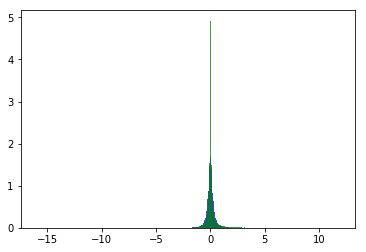

In [138]:
# Histogram: Features.
histX = plt.hist(X_tr.reshape(-1, 1), 500, density=True, facecolor="b", alpha=0.75)
histX = plt.hist(X_te.reshape(-1, 1), 500, density=True, facecolor="g", alpha=0.75)

Number of drops tr = 4315
Number of rises tr = 4436
Number of drops te = 1360
Number of rises te = 1309


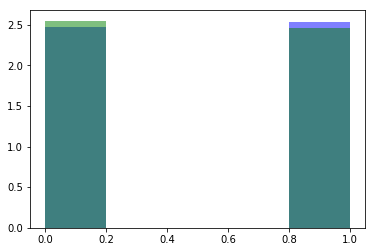

In [142]:
# Histogram: Targets.
histY = plt.hist(Y_tr, 5, density=True, facecolor="b", alpha=0.50)
histY = plt.hist(Y_te, 5, density=True, facecolor="g", alpha=0.50)

# Evalute the number of rise and drops for the training set.
print("Number of drops tr = {}".format(np.sum(Y_tr == 0)))
print("Number of rises tr = {}".format(np.sum(Y_tr == 1)))

# Evaluate the number of rise and drops for the test set.
print("Number of drops te = {}".format(np.sum(Y_te == 0)))
print("Number of rises te = {}".format(np.sum(Y_te == 1)))

## Training

Train a model with keras.

In [143]:
# Import usefull packages.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [150]:
# Reshape the training dataset.
X_train = X_tr.reshape(X_tr.shape[0], -1)
Y_train = Y_tr.reshape(X_tr.shape[0], -1)

# Reshape the test dataset.
X_test = X_te.reshape(X_te.shape[0], -1)
Y_test = Y_te.reshape(X_te.shape[0], -1)

In [174]:
# Build the model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=t*n))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

In [175]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [176]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=256)

Train on 8751 samples, validate on 2669 samples
Epoch 1/20
8751/8751 [==============================] - 1s 77us/step - loss: 0.7172 - acc: 0.5326 - val_loss: 0.6722 - val_acc: 0.6516
Epoch 2/20
8751/8751 [==============================] - 0s 13us/step - loss: 0.6804 - acc: 0.5874 - val_loss: 0.6557 - val_acc: 0.6613
Epoch 3/20
8751/8751 [==============================] - 0s 13us/step - loss: 0.6634 - acc: 0.6263 - val_loss: 0.6371 - val_acc: 0.6673
Epoch 4/20
8751/8751 [==============================] - 0s 13us/step - loss: 0.6388 - acc: 0.6655 - val_loss: 0.6127 - val_acc: 0.6804
Epoch 5/20
8751/8751 [==============================] - 0s 14us/step - loss: 0.6170 - acc: 0.6707 - val_loss: 0.5921 - val_acc: 0.6920
Epoch 6/20
8751/8751 [==============================] - 0s 15us/step - loss: 0.6024 - acc: 0.6874 - val_loss: 0.5843 - val_acc: 0.6886
Epoch 7/20
8751/8751 [==============================] - 0s 15us/step - loss: 0.6004 - acc: 0.6884 - val_loss: 0.5744 - val_acc: 0.6980
Epoch 8

In [177]:
print(history.history)

{'val_loss': [0.6722411082093749, 0.6557280957453168, 0.6370643482712066, 0.6127099636209373, 0.5920701579191837, 0.5843124382278811, 0.5744389489644831, 0.5702038366011173, 0.5687626613888146, 0.5634128684048887, 0.558746805705574, 0.5586447592932171, 0.5571871089015216, 0.5535155026575026, 0.5532624970754464, 0.5526739546939111, 0.5502937667800407, 0.5506404351768265, 0.54833831781303, 0.5487997053535121], 'val_acc': [0.6515548887124174, 0.6612963667743078, 0.6672911196667946, 0.6804046466047731, 0.6920194830417454, 0.688647432580071, 0.6980142366265304, 0.7006369421838509, 0.7002622694413552, 0.7006369426081627, 0.7066316967735848, 0.7032596468925476, 0.7043836638024346, 0.7096290739121264, 0.7092544013259562, 0.7193705517060304, 0.7096290744927636, 0.7107530914026505, 0.7081303852646929, 0.7171225181542429], 'loss': [0.7172202653386854, 0.680418084633853, 0.6633561137008361, 0.6387984368981204, 0.6170003963203352, 0.6024445939058577, 0.6004493872842276, 0.5935631721050532, 0.595928

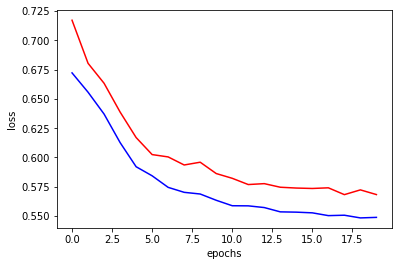

In [178]:
plt.figure()
plt.plot(history.history["loss"], color="r")
plt.plot(history.history["val_loss"], color="b")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()